# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [68]:
# RENAME COLUMNS OF INTEREST

df.rename({
    'SUPPORT_SERVICES_EXPENDITURE':'SPEND_SUPPORT',
    'INSTRUCTION_EXPENDITURE':'SPEND_INSTRUCT',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST',
    'AVG_MATH_4_SCORE':'MATH_4',
    'AVG_MATH_8_SCORE':'MATH_8',
    'AVG_READING_8_SCORE':'READING_8',
    'AVG_READING_4_SCORE':'READING_4',
    },
    axis=1, inplace=True)


In [4]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'SPEND_INSTRUCT', 'SPEND_SUPPORT',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G',
       'GRADES_KG_G', 'ENROLL_4', 'ENROLL_8', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'MATH_4', 'MATH_8', 'READING_4',
       'READING_8'],
      dtype='object')

In [22]:
# Which category has the most valid data?
df[[
    "YEAR",
    "ENROLL_4", "ENROLL_8",
    "MATH_4", "MATH_8",
    "READING_4", "READING_8",
    "SPEND_INSTRUCT", "SPEND_SUPPORT"
    ]].notna().sum()

# READING_4 has the most valid data. I am interested in running a regression
# on READING_4 using SPEND_INSTRUCT and SPEND_SUPPORT as explanatory variables


YEAR              1715
ENROLL_4          1632
ENROLL_8          1632
MATH_4             565
MATH_8             602
READING_4          650
READING_8          562
SPEND_INSTRUCT    1275
SPEND_SUPPORT     1275
dtype: int64

In [26]:
# Drop rows with these missing columns
df.dropna(subset=["YEAR",
                 "ENROLL_4", "READING_4",
                 "SPEND_INSTRUCT", "SPEND_SUPPORT"
                 ], inplace=True)
df.shape

(523, 25)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: **GRADE 4 READING**

How many years of data are logged in our dataset?

In [48]:
# In original dataset, we have 33 years of data [1992, 2019]
dfEDA = pd.read_csv("../data/states_edu.csv")
dfEDA["YEAR"].unique()
dfEDA["YEAR"].nunique()

33

In [49]:
# After data cleanup, dataset includes only 11 years [1992, 2015]
df["YEAR"].unique()
df["YEAR"].nunique()

11

**Note: EDA below is based on cleaned-up data**

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [53]:
# Michigan has a lower average reading score among 4th graders than Ohio

mich_reading_4 = df[df["STATE"] == "MICHIGAN"]["READING_4"].mean()
mich_reading_4

217.8

In [39]:
ohio_reading_4 = df[df["STATE"] == "OHIO"]["READING_4"].mean()
ohio_reading_4

223.11111111111111

Find the average for your chosen test across all states in 2019

In [58]:
# There is no data in 2019 after cleanup, latest year available is 2015
# National average reading score in 2015 is 222.098

df[df["YEAR"] == 2015]["READING_4"].mean()

222.09803921568627

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [63]:
# Use groupby to group by state name
states = df.groupby("STATE")

states["READING_4"].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 215.0
ARKANSAS                219.0
CALIFORNIA              213.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    212.0
FLORIDA                 227.0
GEORGIA                 222.0
HAWAII                  215.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             214.0
MISSOURI                224.0
MONTANA                 227.0
NEBRASKA                227.0
NEVADA                  214.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              231.0
NEW_MEXICO              212.0
NEW_YORK                224.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [77]:
# Create expenditure_per_student for 4th graders

df["SUPPORT_PER_STUDENT"] = df["SPEND_SUPPORT"] / df["ENROLL_ALL"]
df["SUPPORT_PER_STUDENT"] = df["SPEND_SUPPORT"] / df["ENROLL_ALL"]

Feature engineering justification: **The support per-student feature should be a more accurate measurement of how much support each student actually receives on average. It accounts for differences in total support expenditure due to reasons such as a bigger state population size.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

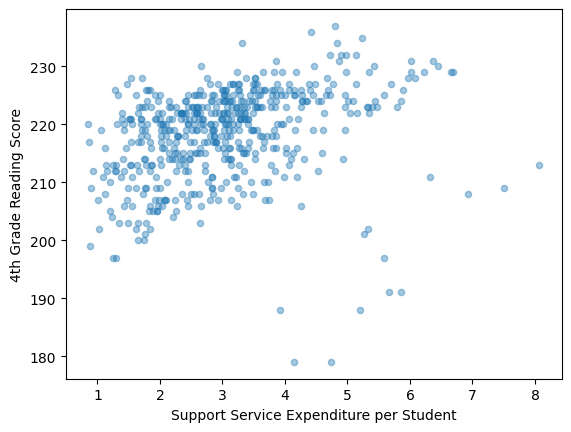

In [83]:
df.plot.scatter(x="SUPPORT_PER_STUDENT", y="READING_4", alpha=0.4)
plt.xlabel("Support Service Expenditure per Student")
plt.ylabel("4th Grade Reading Score")


***Above scatter plot shows a positive correlation between support expenditure per student and the reading score of 4th graders.***

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

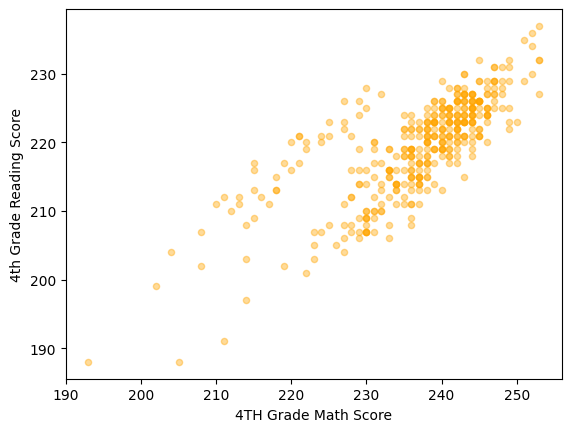

In [86]:
df.plot.scatter(x="MATH_4", y="READING_4", alpha=0.4, color='orange')
plt.xlabel("4th Grade Math Score")
plt.ylabel("4th Grade Reading Score")

***Above scatter plot shows a strong positive correlation between the math score and reading scores of 4th graders.***

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [87]:
from sklearn.model_selection import train_test_split

In [89]:
# Drop missing explanatory variable values from the dataset
X = df[['SUPPORT_PER_STUDENT','MATH_4']].dropna()
y = df.loc[X.index]['READING_4']

# Fill missing responding variable values with the median score
y.fillna(y.median(), inplace=True)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.2, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [91]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [92]:
# create your model here
model = LinearRegression()

In [93]:
model.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [97]:
# Mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

3.2167640479762225

In [98]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

4.10394566345238

In [99]:
# Our regression model has a mean absolute error of 3.22
# and a root mean squared error of 4.1. This means that
# on average, our predictions were only off by 3.22 to 4.1 points

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

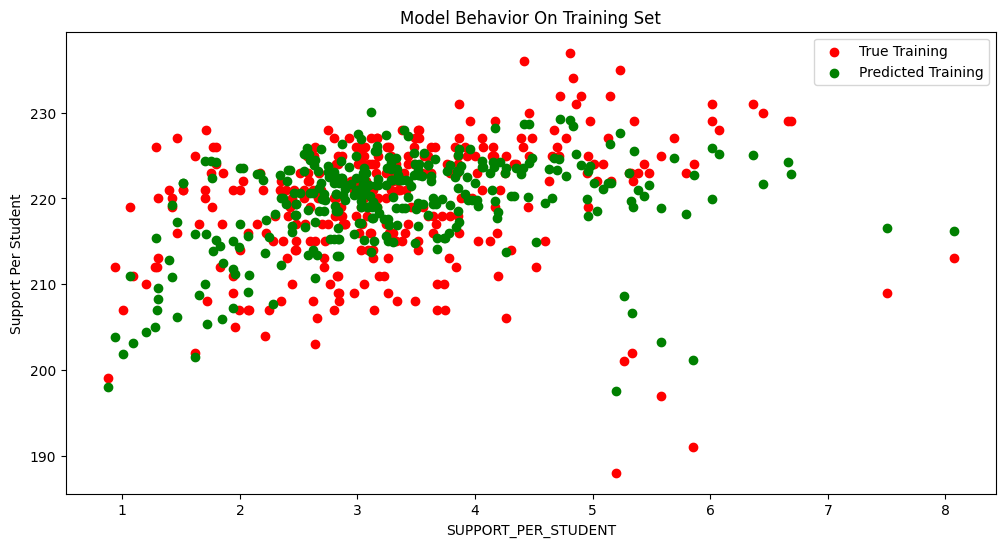

In [95]:
col_name = 'SUPPORT_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Support Per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

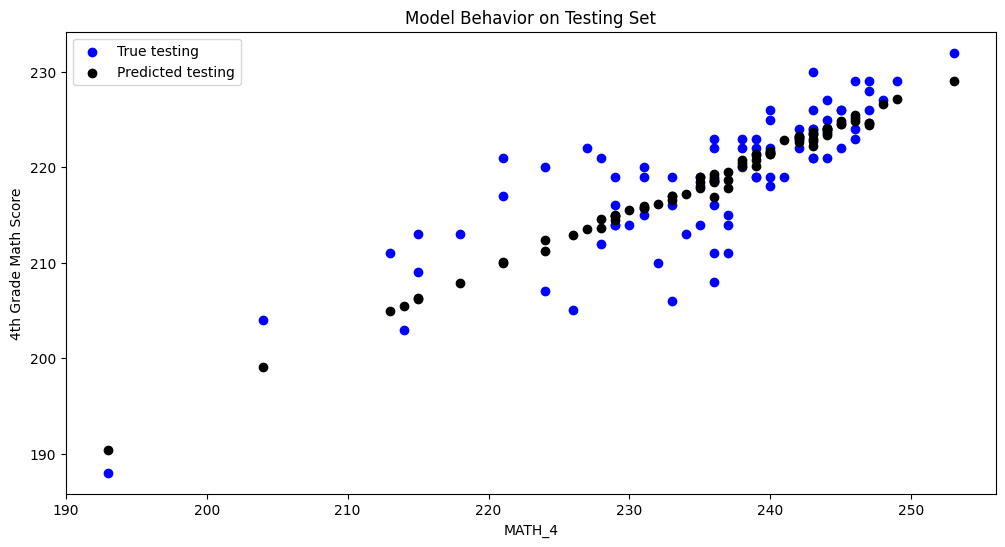

In [96]:
col_name = "MATH_4"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('4th Grade Math Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

  The goal of this project is to develop
machine learning model via Python libraries to predict the **4th Grade Reading Scores** based on potential explanatory variables.

  Initial data exploring revealed a positive correlation between the responding variable and **4th Grade Math Scores** as well as the **Per-student Support Expenditure** data.

  Using a 80-20 train-test split of data, our machine learning model managed to predict the corresponding Reading Scores with a mean absolute error of **3.22 points**, which is pretty good.
